In [1]:
# EDA and Feature Engineering with Flight Price Dataset

## EDA And Feature Engineering Flight Price Prediction
check the dataset info below
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

### FEATURES
The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

In [2]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# reading dataset
df = pd.read_excel('flight_price.xlsx')

In [4]:
# dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# observation
# Only the target/output feature has datatype 'int'
# All other features are of datatype 'object'
# So we have to perform feature engineering and extract data
# which can be further converted to the numerical datatype to train some model

In [7]:
##          DEALING 'Date_of_Journey' COLUMN
#  Extract day, month, and year as numerical datatype feature

df['Date_of_Journey_d'] = df['Date_of_Journey'].str.split('/').str[0]
df['Date_of_Journey_m'] = df['Date_of_Journey'].str.split('/').str[1]
df['Date_of_Journey_y'] = df['Date_of_Journey'].str.split('/').str[2]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Date_of_Journey    10683 non-null  object
 2   Source             10683 non-null  object
 3   Destination        10683 non-null  object
 4   Route              10682 non-null  object
 5   Dep_Time           10683 non-null  object
 6   Arrival_Time       10683 non-null  object
 7   Duration           10683 non-null  object
 8   Total_Stops        10682 non-null  object
 9   Additional_Info    10683 non-null  object
 10  Price              10683 non-null  int64 
 11  Date_of_Journey_d  10683 non-null  object
 12  Date_of_Journey_m  10683 non-null  object
 13  Date_of_Journey_y  10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [8]:
# day, month, and  year are extracted
# but still they have datatype as 'object'
# changing datatype for 3 derived columns

df['Date_of_Journey_d'] = df['Date_of_Journey_d'].astype(int)
df['Date_of_Journey_m'] = df['Date_of_Journey_m'].astype(int)
df['Date_of_Journey_y'] = df['Date_of_Journey_y'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Date_of_Journey    10683 non-null  object
 2   Source             10683 non-null  object
 3   Destination        10683 non-null  object
 4   Route              10682 non-null  object
 5   Dep_Time           10683 non-null  object
 6   Arrival_Time       10683 non-null  object
 7   Duration           10683 non-null  object
 8   Total_Stops        10682 non-null  object
 9   Additional_Info    10683 non-null  object
 10  Price              10683 non-null  int64 
 11  Date_of_Journey_d  10683 non-null  int64 
 12  Date_of_Journey_m  10683 non-null  int64 
 13  Date_of_Journey_y  10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


In [9]:
# as we don't need 'Date_of_Journey' column now
# we can drop it

df.drop('Date_of_Journey', axis=1, inplace=True)

In [10]:
##          DEALING 'Arrival_time' COLUMN
# as observed this column contains time and day together
# so we first need to remove this day
# then we can extract 'Arrival_Time_hour' and Arrival_Time_min as numerical feature

# extracting time
df['Arrival_Time'] = df['Arrival_Time'].apply(lambda x : x.split(' ')[0])

# extracting min and hours
df['Arrival_Time_hour'] = df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Time_min'] = df['Arrival_Time'].str.split(':').str[1]

# changing datatype
df['Arrival_Time_hour'] = df['Arrival_Time_hour'].astype(int)
df['Arrival_Time_min'] = df['Arrival_Time_min'].astype(int)

# droping 'Arrival_Time' column
df.drop('Arrival_Time', axis=1, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Route              10682 non-null  object
 4   Dep_Time           10683 non-null  object
 5   Duration           10683 non-null  object
 6   Total_Stops        10682 non-null  object
 7   Additional_Info    10683 non-null  object
 8   Price              10683 non-null  int64 
 9   Date_of_Journey_d  10683 non-null  int64 
 10  Date_of_Journey_m  10683 non-null  int64 
 11  Date_of_Journey_y  10683 non-null  int64 
 12  Arrival_Time_hour  10683 non-null  int64 
 13  Arrival_Time_min   10683 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.1+ MB
None


In [11]:
##          DEALING 'Dep_Time' COLUMN
# as observed this column contains time
# then we can extract 'Dep_Time_hour' and Dep_Time_min as numerical feature

# extracting min and hours
df['Dep_Time_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dep_Time_min'] = df['Dep_Time'].str.split(':').str[1]

# changing datatype
df['Dep_Time_hour'] = df['Dep_Time_hour'].astype(int)
df['Dep_Time_min'] = df['Dep_Time_min'].astype(int)

# droping 'Arrival_Time' column
df.drop('Dep_Time', axis=1, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Route              10682 non-null  object
 4   Duration           10683 non-null  object
 5   Total_Stops        10682 non-null  object
 6   Additional_Info    10683 non-null  object
 7   Price              10683 non-null  int64 
 8   Date_of_Journey_d  10683 non-null  int64 
 9   Date_of_Journey_m  10683 non-null  int64 
 10  Date_of_Journey_y  10683 non-null  int64 
 11  Arrival_Time_hour  10683 non-null  int64 
 12  Arrival_Time_min   10683 non-null  int64 
 13  Dep_Time_hour      10683 non-null  int64 
 14  Dep_Time_min       10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB
None


In [12]:
##          DROPPING 'Route' COLUMN
df.drop('Route', axis=1, inplace=True)

In [13]:
##          DEALING 'Duration' COLUMN

# extracting time in hours and minutes
df['Duration_hour'] = df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_min'] = df['Duration'].str.split(' ').str[1].str.split('m').str[0]

# as some the Duration values have only hours
# that is why it is showing NaN for some values in 'Duration_min' column
# Handling those values
df['Duration_min'] = df['Duration_min'].fillna(0)

# changing datatypes
df['Duration_hour'] = df['Duration_min'].astype(int)
df['Duration_min'] = df['Duration_min'].astype(int)

# dropping 'Duration' column
df.drop('Duration', axis=1, inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Date_of_Journey_d  10683 non-null  int64 
 7   Date_of_Journey_m  10683 non-null  int64 
 8   Date_of_Journey_y  10683 non-null  int64 
 9   Arrival_Time_hour  10683 non-null  int64 
 10  Arrival_Time_min   10683 non-null  int64 
 11  Dep_Time_hour      10683 non-null  int64 
 12  Dep_Time_min       10683 non-null  int64 
 13  Duration_hour      10683 non-null  int64 
 14  Duration_min       10683 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.2+ MB
None


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Date_of_Journey_d  10683 non-null  int64 
 7   Date_of_Journey_m  10683 non-null  int64 
 8   Date_of_Journey_y  10683 non-null  int64 
 9   Arrival_Time_hour  10683 non-null  int64 
 10  Arrival_Time_min   10683 non-null  int64 
 11  Dep_Time_hour      10683 non-null  int64 
 12  Dep_Time_min       10683 non-null  int64 
 13  Duration_hour      10683 non-null  int64 
 14  Duration_min       10683 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 1.2+ MB


In [15]:
##          DEALING 'Total_Stops' COLUMN

# checking unique values
print(df['Total_Stops'].unique())

# applying mode imputation for NaN values
print(df['Total_Stops'].mode())

# replaing values ( nan value with mode value of the series )
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, np.nan:1, '4 stops':4})

# check, as this col contains only int values, we don't need type conversion
print()
print(df.info())

['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']
0    1 stop
Name: Total_Stops, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10683 non-null  int64 
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   Date_of_Journey_d  10683 non-null  int64 
 7   Date_of_Journey_m  10683 non-null  int64 
 8   Date_of_Journey_y  10683 non-null  int64 
 9   Arrival_Time_hour  10683 non-null  int64 
 10  Arrival_Time_min   10683 non-null  int64 
 11  Dep_Time_hour      10683 non-null  int64 
 12  Dep_Time_min       10683 non-null  int64 
 13  Duration_hour      10683 non-null  int64 
 14  Duration_min       10683 non-nul

In [16]:
##          DEALING 'Additional_Info' COLUMN

print(df['Additional_Info'].unique())

# changing it into ordinal data
# with ranking increases as given below
Mapping_Additional_Info = {
    'No info': 1,
    'No Info': 1,
    'No check-in baggage included': 2,
    'In-flight meal not included': 3,
    'Red-eye flight': 4,
    '1 Short layover': 5,
    '1 Long layover': 6,
    '2 Long layover': 7,
    'Change airports': 8,
    'Business class': 9
}
df['Additional_Info'] = df['Additional_Info'].map(Mapping_Additional_Info)

print()
print(df.info())

['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10683 non-null  int64 
 4   Additional_Info    10683 non-null  int64 
 5   Price              10683 non-null  int64 
 6   Date_of_Journey_d  10683 non-null  int64 
 7   Date_of_Journey_m  10683 non-null  int64 
 8   Date_of_Journey_y  10683 non-null  int64 
 9   Arrival_Time_hour  10683 non-null  int64 
 10  Arrival_Time_min   10683 non-null  int64 
 11  Dep_Time_hour      10683 non-null  int64 
 12  Dep_Time_min       10683 non-null  int

In [17]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date_of_Journey_d,Date_of_Journey_m,Date_of_Journey_y,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,1,3897,24,3,2019,1,10,22,20,50,50
1,Air India,Kolkata,Banglore,2,1,7662,1,5,2019,13,15,5,50,25,25
2,Jet Airways,Delhi,Cochin,2,1,13882,9,6,2019,4,25,9,25,0,0
3,IndiGo,Kolkata,Banglore,1,1,6218,12,5,2019,23,30,18,5,25,25
4,IndiGo,Banglore,New Delhi,1,1,13302,1,3,2019,21,35,16,50,45,45


In [18]:
##          DEALING 'Categorical' COLUMNS

# Using One Hot Encoding
# One-Hot Encoding is a technique used to convert categorical data into a numerical format
# that can be provided to machine learning algorithms, which often require numeric input.
# It avoids the assumption of any ordinal relationship between categories (unlike label encoding),
# which is useful when the categories have no inherent ranking.

from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder()

df1 = pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

df1.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
## Obtaining final dataset

# concatinating both the dataframes
df = pd.concat([df,df1],axis=1)

# dropping the columns
df.drop(['Source', 'Destination', 'Airline'], axis =1, inplace=True)

# placing target column to the last of dataset
col_temp = df.pop('Price')
df['Price']=col_temp

# final dataset that can be processes for ML model
df.head()


,Total_Stops,Additional_Info,Date_of_Journey_d,Date_of_Journey_m,Date_of_Journey_y,Arrival_Time_hour,Arrival_Time_min,Dep_Time_hour,Dep_Time_min,Duration_hour,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0,1,24,3,2019,1,10,22,20,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3897
1,2,1,1,5,2019,13,15,5,50,25,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7662
2,2,1,9,6,2019,4,25,9,25,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13882
3,1,1,12,5,2019,23,30,18,5,25,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6218
4,1,1,1,3,2019,21,35,16,50,45,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13302


**Q1. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.**


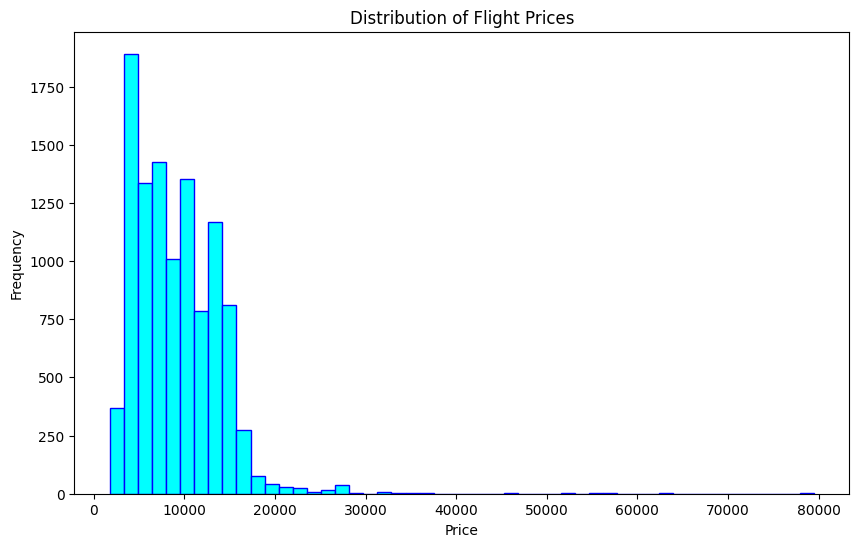

In [20]:
# Plot the histogram
plt.figure(figsize=(10,6))
plt.hist(df['Price'], bins=50, color='aqua', edgecolor='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Q2. What is the range of prices in the dataset? What is the minimum and maximum price?**

In [21]:
print('Maximum Price : {}'.format(df['Price'].max()))
print('Minimum Price : {}'.format(df['Price'].min()))
print('Range : {}'.format(df['Price'].max() - df['Price'].min()))

Maximum Price : 79512
Minimum Price : 1759
Range : 77753


**Q3. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.**

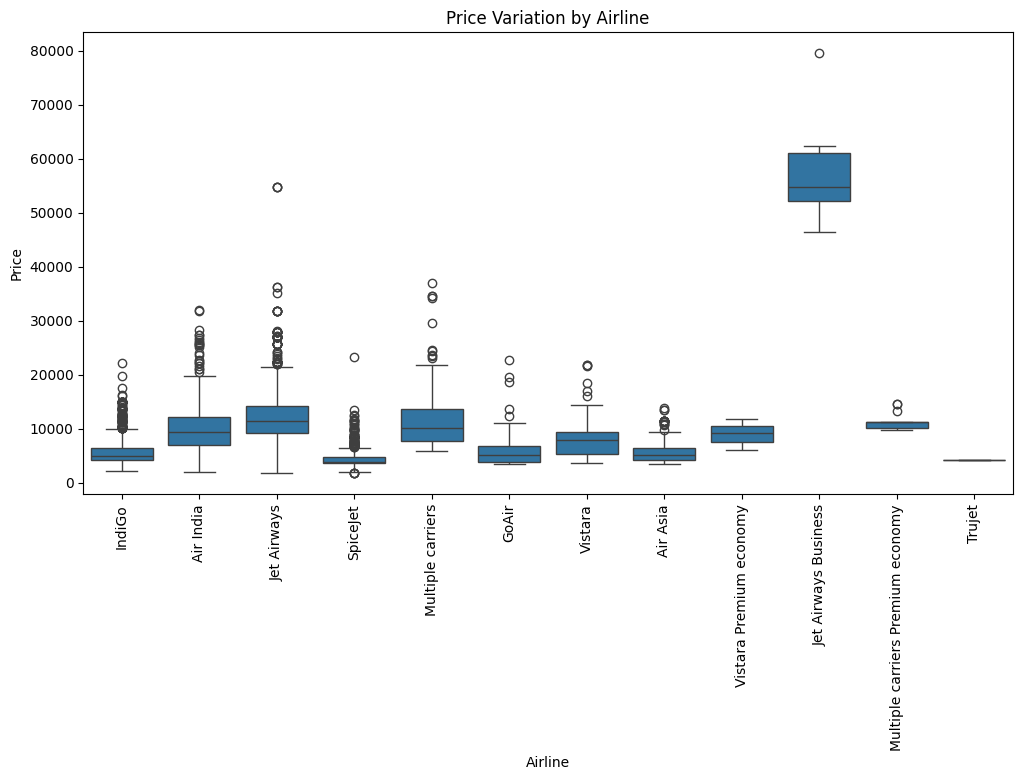

In [22]:
df_temp = pd.read_excel('flight_price.xlsx')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Airline', y='Price', data=df_temp)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Price Variation by Airline')
plt.show()

**Q4. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.**

**Yes**, there are outliers in the dataset (for target varible 'Price').

**Outliers:** In the boxplot, outliers are typically shown as points outside the whiskers of the box. They can be above or below the box and are usually marked with dots.

**Impact on Analysis:** Outliers can significantly impact statistical measures like mean and standard deviation. They might indicate anomalies or unusual pricing that could skew your analysis or model performance.

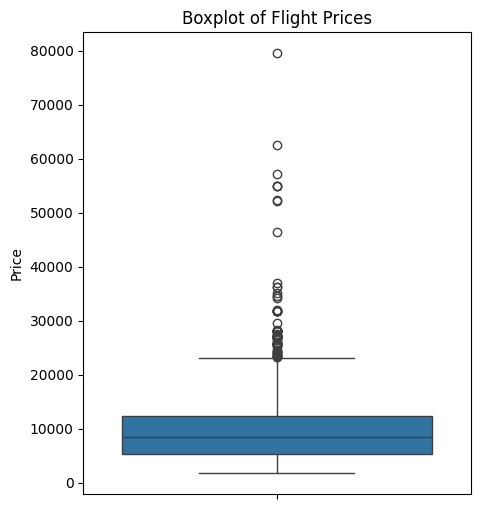

In [23]:
# creating box plot

plt.figure(figsize=(5, 6))
sns.boxplot(y='Price', data=df)
plt.title('Boxplot of Flight Prices')
plt.show()

## Case Study 1

**You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?**

**I will analyze the following features first :**

1. **Date_of_Journey:**

   *Extract Information:* Extract month and day of the week from the Date_of_Journey to determine travel patterns.

   *Analysis:* Analyze flight prices and frequency by month and day to identify trends.

2. **Price:**

   *Seasonal Trends:* Aggregate average or median prices by month to identify peak seasons where prices are typically higher, indicating higher demand.

In [24]:
# to print monthly prices

monthly_prices = df.groupby('Date_of_Journey_m')['Price'].mean().sort_index()
print(monthly_prices)


Date_of_Journey_m
3    10673.205580
4     5770.847081
5     9127.247548
6     8828.796134
Name: Price, dtype: float64


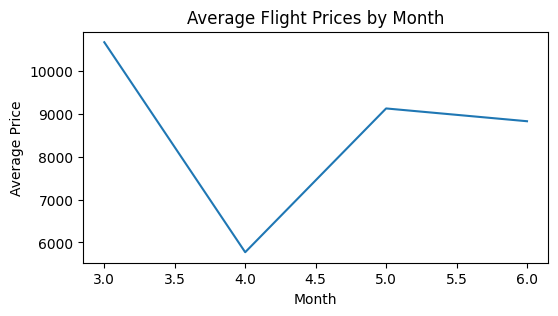

In [25]:
# line plot to present the average prices by month.

plt.figure(figsize=(6, 3))
sns.lineplot(x=monthly_prices.index, y=monthly_prices.values)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Month')
plt.show()


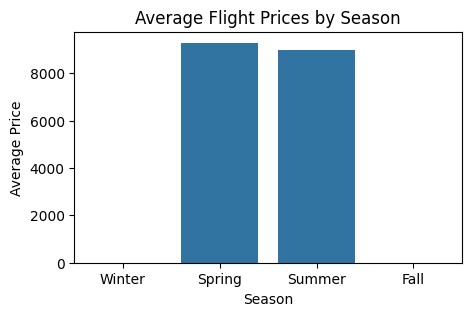

In [26]:
# seasonal analysis

# Step 1. Creating a function to categorize months into seasons
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4]:
        return 'Spring'
    elif month in [5,6, 7]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to the 'Date_of_Journey_m' month
df['Season'] = df['Date_of_Journey_m'].apply(categorize_season)

# Step 3: Group the data by 'Season' and calculate the average price
seasonal_prices = df.groupby('Season')['Price'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Step 4: Visualize the seasonal trends
plt.figure(figsize=(5, 3))
sns.barplot(x=seasonal_prices.index, y=seasonal_prices.values)
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Season')
plt.show()


**Key Findings**

- The 3rd month, **March**, has the highest average, meaning more people travel
during March, followed by the 5th month, **May**."
- People prefer to travel more during the **Spring** and **Summer** seasons.

**Suggestions**

- Consider increasing flight availability or adjusting pricing strategies during these months to capitalize on the higher demand."

## Case Study 2

**You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?**

In [27]:
# As I have already changes all the categorical featurea into numerical features
# Loading original dataset
df_flight = pd.read_excel('flight_price.xlsx')

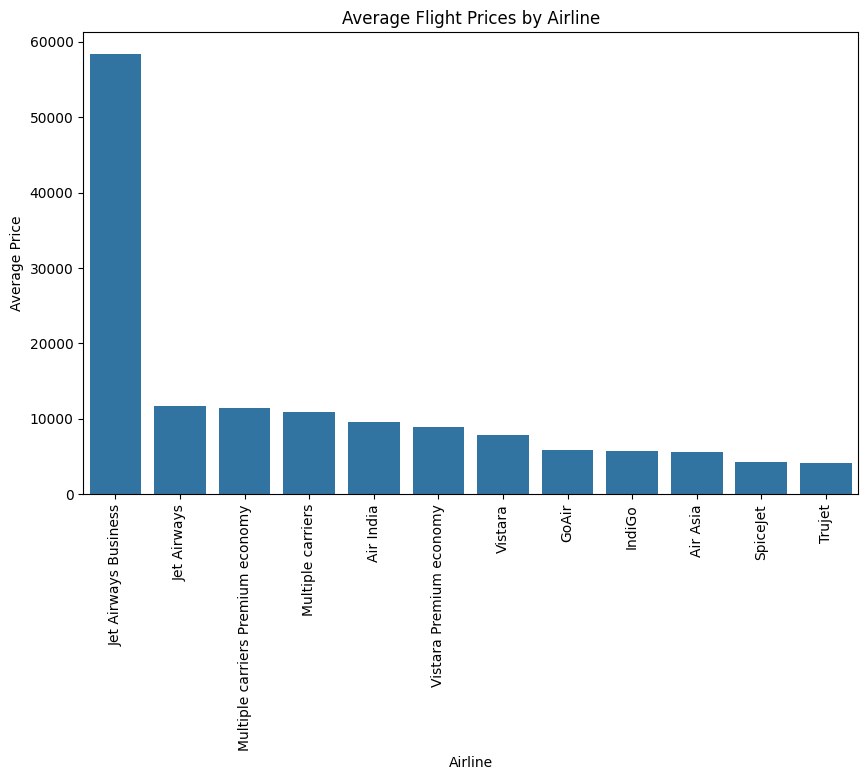

In [28]:
## Analyze the Impact of Airline on Flight Prices

# Group by Airline and calculate the average price

airline_prices = df_flight.groupby('Airline')['Price'].mean().sort_values(ascending=False)

# Visualize the result
plt.figure(figsize=(10, 6))
sns.barplot(x=airline_prices.index, y=airline_prices.values)
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Airline')
plt.show()


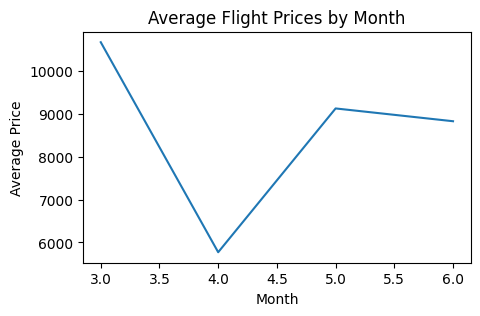

In [29]:
## The Impact of Date_of_Journey (Month) on Flight Prices

# as I have 'month' column extracted in 'df' dataframe as 'Date_of_Journey_m'
# So, I am going to use that here


# Group by month and calculate average price
monthly_prices = df.groupby('Date_of_Journey_m')['Price'].mean().sort_index()

# Visualize the result
plt.figure(figsize=(5, 3))
sns.lineplot(x=monthly_prices.index, y=monthly_prices.values)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Month')
plt.show()


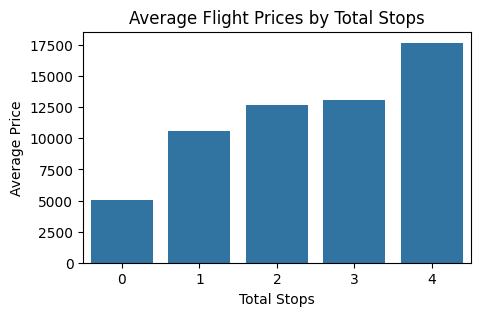

In [30]:
## The Impact of Total_Stops on Flight Prices

# df['Total_Stops'].unique()

# Group by Total_Stops and calculate average price
stops_prices = df.groupby('Total_Stops')['Price'].mean().sort_values(ascending=False)

# Visualize the result
plt.figure(figsize=(5, 3))
sns.barplot(x=stops_prices.index, y=stops_prices.values)
plt.xlabel('Total Stops')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Total Stops')
plt.show()



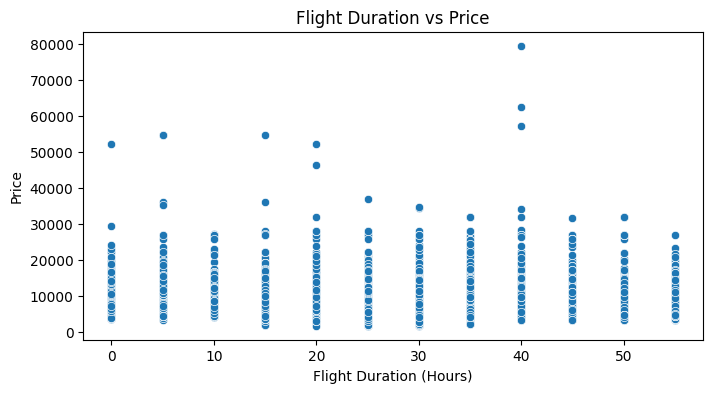

In [31]:
## The Impact of Duration on Flight Prices

#df['Duration_hour'].unique()

# Scatter plot of Duration vs Price
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Duration_hour', y='Price', data=df)
plt.xlabel('Flight Duration (Hours)')
plt.ylabel('Price')
plt.title('Flight Duration vs Price')
plt.show()


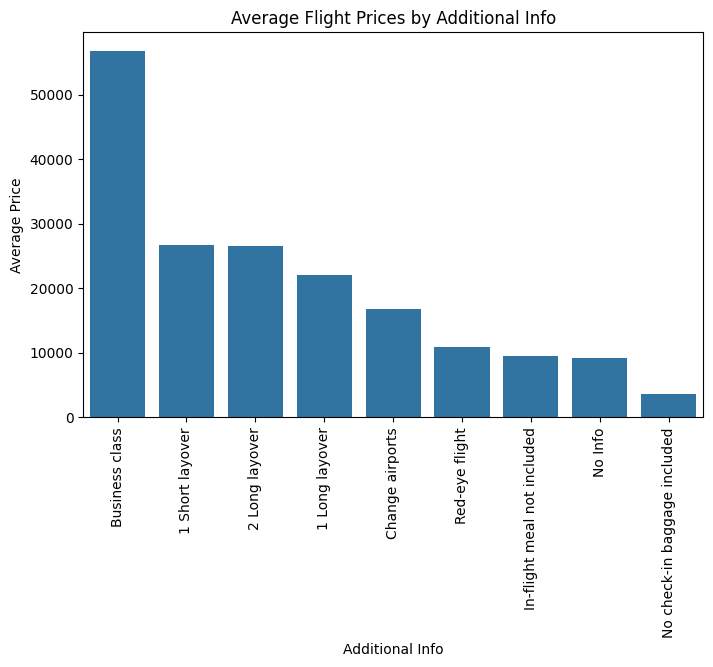

In [32]:
# Analyze the Impact of Additional_Info on Flight Prices

# Group by Additional_Info and calculate average price

# df_flight['Additional_Info'].unique()

# replacing duplicate like values
df_flight['Additional_Info'] = df_flight['Additional_Info'].replace('No info','No Info')

info_prices = df_flight.groupby('Additional_Info')['Price'].mean().sort_values(ascending=False)

# Visualize the result
plt.figure(figsize=(8, 5))
sns.barplot(x=info_prices.index, y=info_prices.values)
plt.xticks(rotation=90)
plt.xlabel('Additional Info')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Additional Info')
plt.show()


**Key Findings**:

- **Jet Airways** shows the highest average flight prices, closely followed by **Multiple Carriers Premium Economy**, indicating a premium pricing strategy (see graph for details).
  
- The **month of March** records the highest number of flight bookings, followed by June, with March also reflecting the highest average price, suggesting strong seasonal demand during this period (see graph).

- **Flight prices increase** proportionally with the number of stops. Notably, flights with **4 stops** have an average cost of **₹17,686**, while **non-stop flights** are significantly cheaper, averaging **₹5,024.90**.

- A positive correlation is observed between **flight duration** and **price**, where longer flight hours consistently result in higher costs.

- **Business class** and **layover flights** are priced significantly higher than **red-eye flights** and those that **exclude meal services**, highlighting the premium associated with added comfort and services.